reference: Python Plotting Tutorials by Yu-Chia Chen (yuchaz@uw.edu)

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pickle
import os
import string

from IPython.display import Image, HTML

#current_color_cycles = plt.rcParams['axes.prop_cycle'].by_key()['color']

### 1. 1d plot

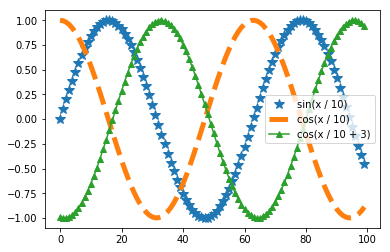

In [2]:
plt.figure()

x = np.arange(100)
y1 = np.sin(x / 10)
y2 = np.cos(x / 10)
y3 = np.cos(x / 10 + 3)

plt.plot(x, y1, '*', label='sin(x / 10)', markersize=10)
plt.plot(x, y2, '--', label='cos(x / 10)', linewidth=5)
plt.plot(x, y3, '^-', label='cos(x / 10 + 3)')

# Call this to render labels set above
plt.legend()
plt.show()

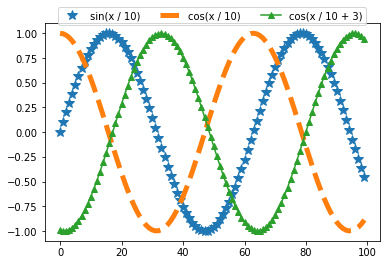

In [5]:
plt.figure()

x = np.arange(100)
y1 = np.sin(x / 10)
y2 = np.cos(x / 10)
y3 = np.cos(x / 10 + 3)

plt.plot(x, y1, '*', label='sin(x / 10)', markersize=10)
plt.plot(x, y2, '--', label='cos(x / 10)', linewidth=5)
plt.plot(x, y3, '^-', label='cos(x / 10 + 3)')

# Call this to render labels set above
plt.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.1))
plt.show()

In [56]:
# create a function legend_to_top to reuse this feature!
def legend_to_top(ncol=3, x0=0.5, y0=1.1):
    plt.legend(ncol=ncol, loc='upper center', bbox_to_anchor=(x0, y0))

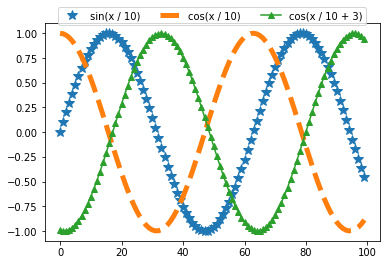

In [62]:
plt.figure()

x = np.arange(100)
y1 = np.sin(x / 10)
y2 = np.cos(x / 10)
y3 = np.cos(x / 10 + 3)

plt.plot(x, y1, '*', label='sin(x / 10)', markersize=10)
plt.plot(x, y2, '--', label='cos(x / 10)', linewidth=5)
plt.plot(x, y3, '^-', label='cos(x / 10 + 3)')

# Call this to render labels set above
legend_to_top(ncol=3, x0=0.5, y0=1.1)
plt.show()

### categorical data

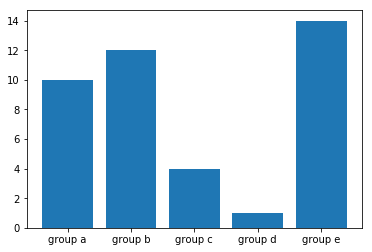

In [14]:
plt.figure()
x_names = ['group {}'.format(xx) for xx in string.ascii_lowercase[:5]]
x_values = np.random.choice(15, 5)

# put label as the first argument, values as the second argument
plt.bar(x_names, x_values)
plt.show()

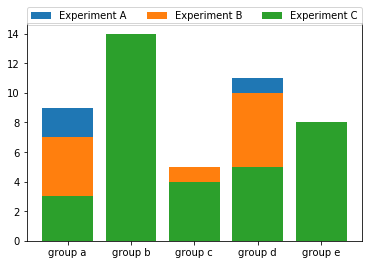

In [16]:
x1_values = np.random.choice(15, 5)
x2_values = np.random.choice(15, 5)
x3_values = np.random.choice(15, 5)

plt.figure()
plt.bar(x_names, x1_values, label='Experiment A')
plt.bar(x_names, x2_values, label='Experiment B')
plt.bar(x_names, x3_values, label='Experiment C')
legend_to_top()

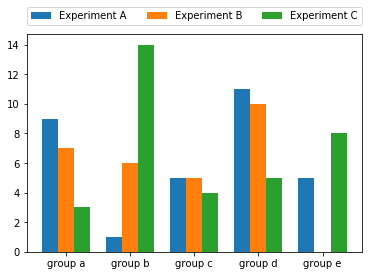

In [72]:
plt.figure()
x_range = np.arange(5)

# First put numerical values
width = .25
plt.bar(x_range - width, x1_values, label='Experiment A', width=width)
plt.bar(x_range, x2_values, label='Experiment B', width=width)
plt.bar(x_range + width, x3_values, label='Experiment C', width=width)

# Then map numerical values to names
plt.xticks(x_range, x_names)

legend_to_top(ncol=3, x0=0.5, y0=1.15)
plt.show()

### 1-d distribution

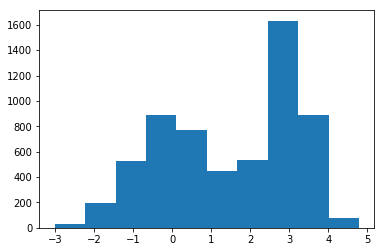

In [20]:
# Generate toy data...
dist_x = np.random.normal(0, 1, 3000)
dist_y = np.random.normal(3, 0.5, 3000)
all_data = np.hstack([dist_x, dist_y])

plt.figure()
plt.hist(all_data)
plt.show()

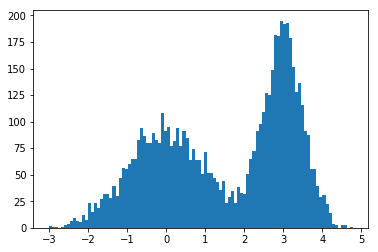

In [42]:
plt.figure()
# Increase the resolution
plt.hist(all_data, bins=100)
plt.show()

### get the percentile of data

In [43]:
np.percentile(all_data,[0,20,40,50,60,100])

array([-3.01206999, -0.27210208,  0.8701303 ,  2.00712863,  2.58116618,
        4.78568877])

### kernel estimate

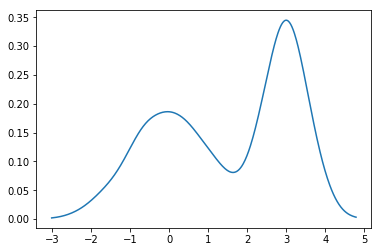

In [45]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(all_data)
min_x, max_x = np.percentile(all_data, [0, 100])

# Estimate density in 500 evenly spaced interval
density_range = np.linspace(min_x, max_x, 500)
estimated_density = kde(density_range)

plt.figure()
plt.plot(density_range, estimated_density)
plt.show()

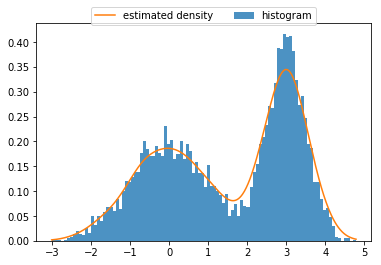

In [51]:
plt.figure()
# Set density=True to report the density.
plt.hist(all_data, bins=100, density=True, alpha=.8, label='histogram')
plt.plot(density_range, estimated_density, label='estimated density')
legend_to_top()

### # What if you have two (or more) distributions...

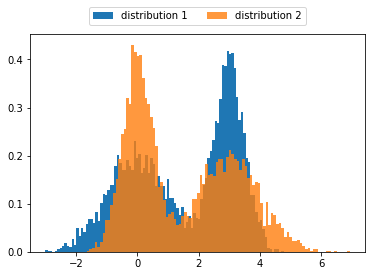

In [73]:
# Generate toy data...
dist_x2 = np.random.normal(0, .5, 3000)
dist_y2 = np.random.normal(3, 1, 3000)
all_data2 = np.hstack([dist_x2, dist_y2])


plt.figure()
plt.hist(all_data, bins=100, density=True, label='distribution 1')

# Set the transparency of the second histogram to 0.8.
plt.hist(all_data2, bins=100, density=True, alpha=.8, label='distribution 2')
legend_to_top(y0=1.15)

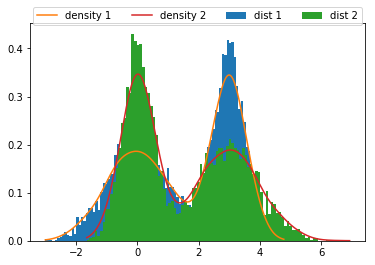

In [95]:
kde1 = gaussian_kde(all_data)
min_x, max_x = np.percentile(all_data, [0, 100])
density_range1 = np.linspace(min_x, max_x, 500)
estimated_density1 = kde1(density_range1)

kde2 = gaussian_kde(all_data2)
min_x, max_x = np.percentile(all_data2, [0, 100])
density_range2 = np.linspace(min_x, max_x, 500)
estimated_density2 = kde2(density_range2)

plt.figure()
plt.hist(all_data, bins=100, density=True, label="dist 1")
plt.plot(density_range1, estimated_density1, label="density 1")
plt.hist(all_data2, bins=100, density=True,label="dist 2")
plt.plot(density_range2, estimated_density2, label="density 2")
legend_to_top(ncol=4)
plt.show()
